<a href="https://colab.research.google.com/github/ShofiQonita/SentimentAnalysis_IndoBert/blob/main/main1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SCRAPPING DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install google-play-scraper

In [ ]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [ ]:
from google_play_scraper import Sort, reviews

review_result, continuation_token = reviews(
    'com.naver.linewebtoon',
    lang='id',
    country='id',
    sort=Sort.NEWEST,
    count=10000,
    filter_score_with=None
)

"from google_play_scraper import Sort, reviews\n\nreview_result, continuation_token = reviews(\n    'com.naver.linewebtoon',\n    lang='id', # defaults to 'en'\n    country='id', # defaults to 'us'\n    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT\n    count=8253, # defaults to 100\n    filter_score_with=None # defaults to None(means all score)\n)"

In [ ]:
Create the DataFrame using the reviews_result variable
df_busu = pd.DataFrame(review_result)
df_busu.head()

'df_busu = pd.DataFrame(review_result)\ndf_busu.head()'

In [ ]:
df_busu.to_csv('/content/drive/MyDrive/dataset/datawebtoon_8253.csv', index=False)

# DATA PREPROCESSING

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/encore1/9652.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9653 entries, 0 to 9652
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviewId  9653 non-null   object
 1   userName  9653 non-null   object
 2   content   9653 non-null   object
 3   score     9653 non-null   int64 
 4   at        9653 non-null   object
dtypes: int64(1), object(4)
memory usage: 377.2+ KB


## CASE FOLDING

In [ ]:
df = data

In [ ]:
def clean_review(text):
    if text is not None:
        original = text
        lowered = text.lower()
        return pd.Series([original, lowered], index=['original', 'lowered'])
    else:
        return pd.Series([None, None], index=['original', 'lowered'])

data[['original', 'lowered']] = data['content'].apply(clean_review)
data[['original', 'lowered']].head(20)

,original,lowered
0,ceritanya banyak yang menarik☺️,ceritanya banyak yang menarik☺️
1,update mulu jadi pas udh beradaptasi dan terbi...,update mulu jadi pas udh beradaptasi dan terbi...
2,tolong dong adain fitur folders! biar bisa mis...,tolong dong adain fitur folders! biar bisa mis...
3,aku udah pake dari THN 2016 puas siih ceritany...,aku udah pake dari thn 2016 puas siih ceritany...
4,"kenapa aku nggak bisa tonton iklan gratis, pad...","kenapa aku nggak bisa tonton iklan gratis, pad..."
5,ini webtoon mau di laporin aja ya ke Kominfo b...,ini webtoon mau di laporin aja ya ke kominfo b...
6,GAK SUKA SAMA TAMPILANNYA YANG BARU SETELAH UP...,gak suka sama tampilannya yang baru setelah up...
7,"Sebenarnya aku suka bngt sama Webtoon, tapi sa...","sebenarnya aku suka bngt sama webtoon, tapi sa..."
8,"tampilan utama nya jadi jelek ,saya lebih suka...","tampilan utama nya jadi jelek ,saya lebih suka..."
9,bgs bgt Klian wajib baca sih...gak ada cerita ...,bgs bgt klian wajib baca sih...gak ada cerita ...


## DATA CLEANING

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 10.8 MB/s eta 0:00:00


In [ ]:
import re
import emoji
import string

def clean_review(text):
    if isinstance(text, str):
        lowered = text.lower()
        lowered = re.sub(r'\n', ' ', lowered)
        lowered = emoji.demojize(lowered)
        lowered = re.sub(r':[A-Za-z_-]+:', ' ', lowered)
        lowered = re.sub(r"([xX;:]'?[dDpPvVoO3)(])", ' ', lowered)
        lowered = re.sub(r'(https?://\S+|www\.\S+)', '', lowered)
        lowered = re.sub(r'#(\S+)', r'\1', lowered)
        lowered = re.sub(r"@[^\s]+[\s]?", '', lowered)
        lowered = re.sub(r'(.)\1{2,}', r'\1\1', lowered)
        lowered = re.sub(f"[{re.escape(string.punctuation)}]", " ", lowered)
        lowered = re.sub('[ ]+', ' ', lowered)

        return lowered.strip()
    else:
        return ""

data['cleaned_content'] = data['content'].apply(clean_review)
data[['content','cleaned_content']].head(20)

,content,cleaned_content
0,ceritanya banyak yang menarik☺️,ceritanya banyak yang menarik
1,update mulu jadi pas udh beradaptasi dan terbi...,update mulu jadi pas udh beradaptasi dan terbi...
2,tolong dong adain fitur folders! biar bisa mis...,tolong dong adain fitur folders biar bisa misa...
3,aku udah pake dari THN 2016 puas siih ceritany...,aku udah pake dari thn 2016 puas siih ceritany...
4,"kenapa aku nggak bisa tonton iklan gratis, pad...",kenapa aku nggak bisa tonton iklan gratis pada...
5,ini webtoon mau di laporin aja ya ke Kominfo b...,ini webtoon mau di laporin aja ya ke kominfo b...
6,GAK SUKA SAMA TAMPILANNYA YANG BARU SETELAH UP...,gak suka sama tampilannya yang baru setelah up...
7,"Sebenarnya aku suka bngt sama Webtoon, tapi sa...",sebenarnya aku suka bngt sama webtoon tapi say...
8,"tampilan utama nya jadi jelek ,saya lebih suka...",tampilan utama nya jadi jelek saya lebih suka ...
9,bgs bgt Klian wajib baca sih...gak ada cerita ...,bgs bgt klian wajib baca sih gak ada cerita 18...


## TOKENISASI

In [ ]:
!pip install nltk
!pip install Sastrawi

import nltk
nltk.download('all')
# Download the 'punkt_tab' resource
nltk.download('punkt_tab')  # This line is added to download the resource
from nltk.tokenize import word_tokenize

def tokenize_text (text):
  # Ensure text is a string before tokenization
  if isinstance(text, str):
    tokens = word_tokenize(text)
    return tokens
  else:
    return [] # Return an empty list for non-string input

data['tokenize'] = data['cleaned_content'].apply(tokenize_text)
data[['content','tokenize']].head(20)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.8 MB/s eta 0:00:00


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

,content,tokenize
0,ceritanya banyak yang menarik☺️,"[ceritanya, banyak, yang, menarik]"
1,update mulu jadi pas udh beradaptasi dan terbi...,"[update, mulu, jadi, pas, udh, beradaptasi, da..."
2,tolong dong adain fitur folders! biar bisa mis...,"[tolong, dong, adain, fitur, folders, biar, bi..."
3,aku udah pake dari THN 2016 puas siih ceritany...,"[aku, udah, pake, dari, thn, 2016, puas, siih,..."
4,"kenapa aku nggak bisa tonton iklan gratis, pad...","[kenapa, aku, nggak, bisa, tonton, iklan, grat..."
5,ini webtoon mau di laporin aja ya ke Kominfo b...,"[ini, webtoon, mau, di, laporin, aja, ya, ke, ..."
6,GAK SUKA SAMA TAMPILANNYA YANG BARU SETELAH UP...,"[gak, suka, sama, tampilannya, yang, baru, set..."
7,"Sebenarnya aku suka bngt sama Webtoon, tapi sa...","[sebenarnya, aku, suka, bngt, sama, webtoon, t..."
8,"tampilan utama nya jadi jelek ,saya lebih suka...","[tampilan, utama, nya, jadi, jelek, saya, lebi..."
9,bgs bgt Klian wajib baca sih...gak ada cerita ...,"[bgs, bgt, klian, wajib, baca, sih, gak, ada, ..."


## NON STANDAR WORD NORMALIZATION

In [ ]:
normalizad_word = pd.read_csv("/content/drive/MyDrive/dataset/kamus_alay.csv", header=None)
normalizad_word_dict = dict(zip(normalizad_word[0], normalizad_word[1]))

def normalized_term(tokens):
    return [normalizad_word_dict.get(term, term) for term in tokens]

data['text_normalized'] = data['tokenize'].apply(normalized_term)
data[['content','text_normalized']].head(20)

,content,text_normalized
0,ceritanya banyak yang menarik☺️,"[ceritanya, banyak, yang, menarik]"
1,update mulu jadi pas udh beradaptasi dan terbi...,"[update, mulu, jadi, pas, sudah, beradaptasi, ..."
2,tolong dong adain fitur folders! biar bisa mis...,"[tolong, dong, mengadakan, fitur, folders, bia..."
3,aku udah pake dari THN 2016 puas siih ceritany...,"[aku, sudah, pakai, dari, tahun, 2016, puas, s..."
4,"kenapa aku nggak bisa tonton iklan gratis, pad...","[kenapa, aku, enggak, bisa, tonton, iklan, gra..."
5,ini webtoon mau di laporin aja ya ke Kominfo b...,"[ini, webtoon, mau, di, laporin, saja, ya, ke,..."
6,GAK SUKA SAMA TAMPILANNYA YANG BARU SETELAH UP...,"[enggak, suka, sama, tampilannya, yang, baru, ..."
7,"Sebenarnya aku suka bngt sama Webtoon, tapi sa...","[sebenarnya, aku, suka, banget, sama, webtoon,..."
8,"tampilan utama nya jadi jelek ,saya lebih suka...","[tampilan, utama, nya, jadi, jelek, saya, lebi..."
9,bgs bgt Klian wajib baca sih...gak ada cerita ...,"[bagus, banget, kalian, wajib, baca, sih, engg..."


## STOPWORDS

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = set(factory.get_stop_words())
print (stopwords)

{'sehingga', 'sementara', 'bahwa', 'amat', 'untuk', 'dan', 'yakni', 'dua', 'dst', 'saya', 'walau', 'pun', 'setiap', 'seolah', 'demikian', 'setelah', 'kecuali', 'para', 'ya', 'secara', 'sesudah', 'dll', 'dia', 'kenapa', 'juga', 'sesuatu', 'selain', 'selagi', 'akan', 'saja', 'bisa', 'masih', 'sambil', 'dengan', 'itulah', 'karena', 'seharusnya', 'ingin', 'seraya', 'lagi', 'dapat', 'seterusnya', 'boleh', 'hanya', 'seperti', 'saat', 'yang', 'kemana', 'sebetulnya', 'di', 'pasti', 'anda', 'terhadap', 'oh', 'tanpa', 'kita', 'hal', 'kami', 'nggak', 'menurut', 'mari', 'ketika', 'apalagi', 'supaya', 'dulunya', 'ok', 'namun', 'kembali', 'adalah', 'sekitar', 'jika', 'oleh', 'kepada', 'telah', 'yaitu', 'pula', 'setidaknya', 'belum', 'dimana', 'atau', 'tolong', 'apakah', 'pada', 'sebagai', 'itu', 'maka', 'dahulu', 'dalam', 'nanti', 'ada', 'sedangkan', 'sebab', 'daripada', 'sebelum', 'melainkan', 'tentu', 'anu', 'kah', 'bagi', 'ke', 'agar', 'ini', 'sampai', 'harus', 'lain', 'tentang', 'tidak', 'ia', '

In [ ]:
# STOPWORD REMOVAL DENGAN SASTRAWI
factory = StopWordRemoverFactory()
stopwords = set(factory.get_stop_words())

def stopword_text(tokens):
    return [token for token in tokens if token not in stopwords]

data['stop'] = data['text_normalized'].apply(stopword_text)
data[['content', 'stop']].head(20)

,content,stop
0,ceritanya banyak yang menarik☺️,"[ceritanya, banyak, menarik]"
1,update mulu jadi pas udh beradaptasi dan terbi...,"[update, mulu, jadi, pas, beradaptasi, terbias..."
2,tolong dong adain fitur folders! biar bisa mis...,"[dong, mengadakan, fitur, folders, biar, misah..."
3,aku udah pake dari THN 2016 puas siih ceritany...,"[aku, pakai, tahun, 2016, puas, sih, ceritanya..."
4,"kenapa aku nggak bisa tonton iklan gratis, pad...","[aku, enggak, tonton, iklan, gratis, padahal, ..."
5,ini webtoon mau di laporin aja ya ke Kominfo b...,"[webtoon, mau, laporin, kominfo, biar, ban, ap..."
6,GAK SUKA SAMA TAMPILANNYA YANG BARU SETELAH UP...,"[enggak, suka, sama, tampilannya, baru, update..."
7,"Sebenarnya aku suka bngt sama Webtoon, tapi sa...","[sebenarnya, aku, suka, banget, sama, webtoon,..."
8,"tampilan utama nya jadi jelek ,saya lebih suka...","[tampilan, utama, nya, jadi, jelek, lebih, suk..."
9,bgs bgt Klian wajib baca sih...gak ada cerita ...,"[bagus, banget, kalian, wajib, baca, sih, engg..."


## STEMMING

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

def stemming_text(tokens):
    hasil = [stemmer.stem(token) for token in tokens]
    return hasil

data['stemmed'] = data['text_normalized'].apply(stemming_text)
data.head(20)

,reviewId,userName,content,score,at,original,lowered,cleaned_content,tokenize,text_normalized,stop,stemmed
0,f0281231-d1be-4192-93b8-d123e6d36b26,Pengguna Google,ceritanya banyak yang menarik☺️,5,2025-06-30 23:40:48,ceritanya banyak yang menarik☺️,ceritanya banyak yang menarik☺️,ceritanya banyak yang menarik,"[ceritanya, banyak, yang, menarik]","[ceritanya, banyak, yang, menarik]","[ceritanya, banyak, menarik]","[cerita, banyak, yang, tarik]"
1,2a79e801-836d-490e-b814-c23562e5da9d,Pengguna Google,update mulu jadi pas udh beradaptasi dan terbi...,3,2025-06-30 23:09:58,update mulu jadi pas udh beradaptasi dan terbi...,update mulu jadi pas udh beradaptasi dan terbi...,update mulu jadi pas udh beradaptasi dan terbi...,"[update, mulu, jadi, pas, udh, beradaptasi, da...","[update, mulu, jadi, pas, sudah, beradaptasi, ...","[update, mulu, jadi, pas, beradaptasi, terbias...","[update, mulu, jadi, pas, sudah, adaptasi, dan..."
2,14660208-88bf-46e3-b683-d61081fcf6f8,Pengguna Google,tolong dong adain fitur folders! biar bisa mis...,4,2025-06-30 22:47:23,tolong dong adain fitur folders! biar bisa mis...,tolong dong adain fitur folders! biar bisa mis...,tolong dong adain fitur folders biar bisa misa...,"[tolong, dong, adain, fitur, folders, biar, bi...","[tolong, dong, mengadakan, fitur, folders, bia...","[dong, mengadakan, fitur, folders, biar, misah...","[tolong, dong, ada, fitur, folders, biar, bisa..."
3,2d30f71d-a640-485c-8cfe-fe46b984c035,Pengguna Google,aku udah pake dari THN 2016 puas siih ceritany...,5,2025-06-30 22:17:25,aku udah pake dari THN 2016 puas siih ceritany...,aku udah pake dari thn 2016 puas siih ceritany...,aku udah pake dari thn 2016 puas siih ceritany...,"[aku, udah, pake, dari, thn, 2016, puas, siih,...","[aku, sudah, pakai, dari, tahun, 2016, puas, s...","[aku, pakai, tahun, 2016, puas, sih, ceritanya...","[aku, sudah, pakai, dari, tahun, 2016, puas, s..."
4,cd3ef6c9-c16a-4735-8f79-fe5897cbe0f6,Pengguna Google,"kenapa aku nggak bisa tonton iklan gratis, pad...",1,2025-06-30 21:16:54,"kenapa aku nggak bisa tonton iklan gratis, pad...","kenapa aku nggak bisa tonton iklan gratis, pad...",kenapa aku nggak bisa tonton iklan gratis pada...,"[kenapa, aku, nggak, bisa, tonton, iklan, grat...","[kenapa, aku, enggak, bisa, tonton, iklan, gra...","[aku, enggak, tonton, iklan, gratis, padahal, ...","[kenapa, aku, enggak, bisa, tonton, iklan, gra..."
5,daa6b050-056b-47a4-aae2-13f98735927a,Pengguna Google,ini webtoon mau di laporin aja ya ke Kominfo b...,1,2025-06-30 20:51:03,ini webtoon mau di laporin aja ya ke Kominfo b...,ini webtoon mau di laporin aja ya ke kominfo b...,ini webtoon mau di laporin aja ya ke kominfo b...,"[ini, webtoon, mau, di, laporin, aja, ya, ke, ...","[ini, webtoon, mau, di, laporin, saja, ya, ke,...","[webtoon, mau, laporin, kominfo, biar, ban, ap...","[ini, webtoon, mau, di, laporin, saja, ya, ke,..."
6,1c2640b4-5909-47a1-8342-37a278a909e4,Pengguna Google,GAK SUKA SAMA TAMPILANNYA YANG BARU SETELAH UP...,1,2025-06-30 20:19:39,GAK SUKA SAMA TAMPILANNYA YANG BARU SETELAH UP...,gak suka sama tampilannya yang baru setelah up...,gak suka sama tampilannya yang baru setelah up...,"[gak, suka, sama, tampilannya, yang, baru, set...","[enggak, suka, sama, tampilannya, yang, baru, ...","[enggak, suka, sama, tampilannya, baru, update...","[enggak, suka, sama, tampil, yang, baru, telah..."
7,f798b02e-f825-45be-b158-d62d87690f8a,Pengguna Google,"Sebenarnya aku suka bngt sama Webtoon, tapi sa...",3,2025-06-30 19:00:07,"Sebenarnya aku suka bngt sama Webtoon, tapi sa...","sebenarnya aku suka bngt sama webtoon, tapi sa...",sebenarnya aku suka bngt sama webtoon tapi say...,"[sebenarnya, aku, suka, bngt, sama, webtoon, t...","[sebenarnya, aku, suka, banget, sama, webtoon,...","[sebenarnya, aku, suka, banget, sama, webtoon,...","[benar, aku, suka, banget, sama, webtoon, tapi..."
8,afa7025d-55ef-4081-84eb-12e616e20c0a,Pengguna Google,"tampilan utama nya jadi jelek ,saya lebih suka...",1,2025-06-30 18:55:28,"tampilan utama n

In [ ]:
import ast

data['stemmed_g'] = data['stemmed'].apply(lambda x: " ".join(ast.literal_eval(x)) if isinstance(x, str) else " ".join(x))

data.head(20)

,reviewId,userName,content,score,at,original,lowered,cleaned_content,tokenize,text_normalized,stop,stemmed,stemmed_g
0,f0281231-d1be-4192-93b8-d123e6d36b26,Pengguna Google,ceritanya banyak yang menarik☺️,5,2025-06-30 23:40:48,ceritanya banyak yang menarik☺️,ceritanya banyak yang menarik☺️,ceritanya banyak yang menarik,"[ceritanya, banyak, yang, menarik]","[ceritanya, banyak, yang, menarik]","[ceritanya, banyak, menarik]","[cerita, banyak, yang, tarik]",cerita banyak yang tarik
1,2a79e801-836d-490e-b814-c23562e5da9d,Pengguna Google,update mulu jadi pas udh beradaptasi dan terbi...,3,2025-06-30 23:09:58,update mulu jadi pas udh beradaptasi dan terbi...,update mulu jadi pas udh beradaptasi dan terbi...,update mulu jadi pas udh beradaptasi dan terbi...,"[update, mulu, jadi, pas, udh, beradaptasi, da...","[update, mulu, jadi, pas, sudah, beradaptasi, ...","[update, mulu, jadi, pas, beradaptasi, terbias...","[update, mulu, jadi, pas, sudah, adaptasi, dan...",update mulu jadi pas sudah adaptasi dan biasa ...
2,14660208-88bf-46e3-b683-d61081fcf6f8,Pengguna Google,tolong dong adain fitur folders! biar bisa mis...,4,2025-06-30 22:47:23,tolong dong adain fitur folders! biar bisa mis...,tolong dong adain fitur folders! biar bisa mis...,tolong dong adain fitur folders biar bisa misa...,"[tolong, dong, adain, fitur, folders, biar, bi...","[tolong, dong, mengadakan, fitur, folders, bia...","[dong, mengadakan, fitur, folders, biar, misah...","[tolong, dong, ada, fitur, folders, biar, bisa...",tolong dong ada fitur folders biar bisa misahi...
3,2d30f71d-a640-485c-8cfe-fe46b984c035,Pengguna Google,aku udah pake dari THN 2016 puas siih ceritany...,5,2025-06-30 22:17:25,aku udah pake dari THN 2016 puas siih ceritany...,aku udah pake dari thn 2016 puas siih ceritany...,aku udah pake dari thn 2016 puas siih ceritany...,"[aku, udah, pake, dari, thn, 2016, puas, siih,...","[aku, sudah, pakai, dari, tahun, 2016, puas, s...","[aku, pakai, tahun, 2016, puas, sih, ceritanya...","[aku, sudah, pakai, dari, tahun, 2016, puas, s...",aku sudah pakai dari tahun 2016 puas sih cerit...
4,cd3ef6c9-c16a-4735-8f79-fe5897cbe0f6,Pengguna Google,"kenapa aku nggak bisa tonton iklan gratis, pad...",1,2025-06-30 21:16:54,"kenapa aku nggak bisa tonton iklan gratis, pad...","kenapa aku nggak bisa tonton iklan gratis, pad...",kenapa aku nggak bisa tonton iklan gratis pada...,"[kenapa, aku, nggak, bisa, tonton, iklan, grat...","[kenapa, aku, enggak, bisa, tonton, iklan, gra...","[aku, enggak, tonton, iklan, gratis, padahal, ...","[kenapa, aku, enggak, bisa, tonton, iklan, gra...",kenapa aku enggak bisa tonton iklan gratis pad...
5,daa6b050-056b-47a4-aae2-13f98735927a,Pengguna Google,ini webtoon mau di laporin aja ya ke Kominfo b...,1,2025-06-30 20:51:03,ini webtoon mau di laporin aja ya ke Kominfo b...,ini webtoon mau di laporin aja ya ke kominfo b...,ini webtoon mau di laporin aja ya ke kominfo b...,"[ini, webtoon, mau, di, laporin, aja, ya, ke, ...","[ini, webtoon, mau, di, laporin, saja, ya, ke,...","[webtoon, mau, laporin, kominfo, biar, ban, ap...","[ini, webtoon, mau, di, laporin, saja, ya, ke,...",ini webtoon mau di laporin saja ya ke kominfo ...
6,1c2640b4-5909-47a1-8342-37a278a909e4,Pengguna Google,GAK SUKA SAMA TAMPILANNYA YANG BARU SETELAH UP...,1,2025-06-30 20:19:39,GAK SUKA SAMA TAMPILANNYA YANG BARU SETELAH UP...,gak suka sama tampilannya yang baru setelah up...,gak suka sama tampilannya yang baru setelah up...,"[gak, suka, sama, tampilannya, yang, baru, set...","[enggak, suka, sama, tampilannya, yang, baru, ...","[enggak, suka, sama, tampilannya, baru, update...","[enggak, suka, sama, tampil, yang, baru, telah...",enggak suka sama tampil yang baru telah update...
7,f798b02e-f825-45be-b158-d62d87690f8a,Pengguna Google,"Sebenarnya aku suka bngt sama Webtoon, tapi sa...",3,2025-06-30 19:00:07,"Sebenarnya aku suka bngt sama Webtoon, tapi sa...","sebenarnya aku suka bngt sama webtoon, tapi sa...",sebenarnya aku suka bngt sama webtoon tapi say...,"[sebenarnya, aku, 

In [ ]:
mask_whitespace = data['stemmed_g'].astype(str).str.strip() == ""

data[mask_whitespace]

,reviewId,userName,content,score,at,original,lowered,cleaned_content,tokenize,text_normalized,stop,stemmed,stemmed_g
173,30a94255-c963-413a-8bc8-8c676de93c26,Pengguna Google,❤️,5,2025-06-29 7:36:37,❤️,❤️,,[],[],[],[],
320,ac95f376-5308-4265-b343-34a278961397,Pengguna Google,👍👍👍👍👍,5,2025-06-27 3:03:42,👍👍👍👍👍,👍👍👍👍👍,,[],[],[],[],
335,dffb2f21-a5e2-4e1d-9b29-58d7c6d6b7bd,Pengguna Google,😄,4,2025-06-26 23:02:14,😄,😄,,[],[],[],[],
371,0ac41eb6-2913-4f0b-8e58-1e7d06be18a7,Pengguna Google,🤭,5,2025-06-26 4:13:21,🤭,🤭,,[],[],[],[],
455,c3cb3db8-4bce-4211-8c44-de16d87b4a65,Pengguna Google,👍🏻,5,2025-06-24 16:41:14,👍🏻,👍🏻,,[],[],[],[],
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9402,362269e0-622a-40cc-97ee-1af6ee0cca4e,Pengguna Google,👍,5,2025-01-04 18:14:49,👍,👍,,[],[],[],[],
9425,bbce8593-f0d4-47fa-a33c-50852bb571c1,Pengguna Google,🗿👍,1,2025-01-04 12:04:15,🗿👍,🗿👍,,[],[],[],[],
9464,67e3945c-eaa1-44ad-bc1a-68c94ce1e875,Pengguna Google,👍🏻,3,2025-01-03 18:22:43,👍🏻,👍🏻,,[],[],[],[],
9514,835753df-5c20-4f74-848d-254ed5658fdb,Pengguna Google,🗿👍,5,2025-01-03 5:24:21,🗿👍,🗿👍,,[],[],[],[],


In [ ]:
data = data.dropna(subset=['stemmed_g'])
data = data[~data['stemmed_g'].astype(str).str.strip().eq("")]

In [ ]:
mask_whitespace = data['stemmed_g'].astype(str).str.strip() == ""

data[mask_whitespace]

,reviewId,userName,content,score,at,original,lowered,cleaned_content,tokenize,text_normalized,stop,stemmed,stemmed_g


In [ ]:
data.to_csv('/content/drive/MyDrive/encore1/preprocessing.csv', index=False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9449 entries, 0 to 9652
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   reviewId         9449 non-null   object
 1   userName         9449 non-null   object
 2   content          9449 non-null   object
 3   score            9449 non-null   int64 
 4   at               9449 non-null   object
 5   original         9449 non-null   object
 6   lowered          9449 non-null   object
 7   cleaned_content  9449 non-null   object
 8   tokenize         9449 non-null   object
 9   text_normalized  9449 non-null   object
 10  stop             9449 non-null   object
 11  stemmed          9449 non-null   object
 12  stemmed_g        9449 non-null   object
dtypes: int64(1), object(12)
memory usage: 1.0+ MB


# LABELLING

## RATING BASED LABELLING

In [ ]:
pd.read_csv('/content/drive/MyDrive/encore1/preprocessing.csv')

,reviewId,userName,content,score,at,original,lowered,cleaned_content,tokenize,text_normalized,stop,stemmed,stemmed_g
0,f0281231-d1be-4192-93b8-d123e6d36b26,Pengguna Google,ceritanya banyak yang menarik☺️,5,2025-06-30 23:40:48,ceritanya banyak yang menarik☺️,ceritanya banyak yang menarik☺️,ceritanya banyak yang menarik,"['ceritanya', 'banyak', 'yang', 'menarik']","['ceritanya', 'banyak', 'yang', 'menarik']","['ceritanya', 'banyak', 'menarik']","['cerita', 'banyak', 'yang', 'tarik']",cerita banyak yang tarik
1,2a79e801-836d-490e-b814-c23562e5da9d,Pengguna Google,update mulu jadi pas udh beradaptasi dan terbi...,3,2025-06-30 23:09:58,update mulu jadi pas udh beradaptasi dan terbi...,update mulu jadi pas udh beradaptasi dan terbi...,update mulu jadi pas udh beradaptasi dan terbi...,"['update', 'mulu', 'jadi', 'pas', 'udh', 'bera...","['update', 'mulu', 'jadi', 'pas', 'sudah', 'be...","['update', 'mulu', 'jadi', 'pas', 'beradaptasi...","['update', 'mulu', 'jadi', 'pas', 'sudah', 'ad...",update mulu jadi pas sudah adaptasi dan biasa ...
2,14660208-88bf-46e3-b683-d61081fcf6f8,Pengguna Google,tolong dong adain fitur folders! biar bisa mis...,4,2025-06-30 22:47:23,tolong dong adain fitur folders! biar bisa mis...,tolong dong adain fitur folders! biar bisa mis...,tolong dong adain fitur folders biar bisa misa...,"['tolong', 'dong', 'adain', 'fitur', 'folders'...","['tolong', 'dong', 'mengadakan', 'fitur', 'fol...","['dong', 'mengadakan', 'fitur', 'folders', 'bi...","['tolong', 'dong', 'ada', 'fitur', 'folders', ...",tolong dong ada fitur folders biar bisa misahi...
3,2d30f71d-a640-485c-8cfe-fe46b984c035,Pengguna Google,aku udah pake dari THN 2016 puas siih ceritany...,5,2025-06-30 22:17:25,aku udah pake dari THN 2016 puas siih ceritany...,aku udah pake dari thn 2016 puas siih ceritany...,aku udah pake dari thn 2016 puas siih ceritany...,"['aku', 'udah', 'pake', 'dari', 'thn', '2016',...","['aku', 'sudah', 'pakai', 'dari', 'tahun', '20...","['aku', 'pakai', 'tahun', '2016', 'puas', 'sih...","['aku', 'sudah', 'pakai', 'dari', 'tahun', '20...",aku sudah pakai dari tahun 2016 puas sih cerit...
4,cd3ef6c9-c16a-4735-8f79-fe5897cbe0f6,Pengguna Google,"kenapa aku nggak bisa tonton iklan gratis, pad...",1,2025-06-30 21:16:54,"kenapa aku nggak bisa tonton iklan gratis, pad...","kenapa aku nggak bisa tonton iklan gratis, pad...",kenapa aku nggak bisa tonton iklan gratis pada...,"['kenapa', 'aku', 'nggak', 'bisa', 'tonton', '...","['kenapa', 'aku', 'enggak', 'bisa', 'tonton', ...","['aku', 'enggak', 'tonton', 'iklan', 'gratis',...","['kenapa', 'aku', 'enggak', 'bisa', 'tonton', ...",kenapa aku enggak bisa tonton iklan gratis pad...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9444,f2774bc4-5d11-42df-9479-71e9e2b6866e,Pengguna Google,Aplikasinya bagus banget apa lagi gambar nya b...,5,2025-01-01 3:02:36,Aplikasinya bagus banget apa lagi gambar nya b...,aplikasinya bagus banget apa lagi gambar nya b...,aplikasinya bagus banget apa lagi gambar nya b...,"['aplikasinya', 'bagus', 'banget', 'apa', 'lag...","['aplikasinya', 'bagus', 'banget', 'apa', 'lag...","['aplikasinya', 'bagus', 'banget', 'apa', 'gam...","['aplikasi', 'bagus', 'banget', 'apa', 'lagi',...",aplikasi bagus banget apa lagi gambar nya bagu...
9445,0aa3d71e-4f64-47da-92c7-1a45b123438a,Pengguna Google,"Cerita pada bagus"" apalagi sy pecinta cerita h...",4,2025-01-01 2:24:01,"Cerita pada bagus"" apalagi sy pecinta cerita h...","cerita pada bagus"" apalagi sy pecinta cerita h...",cerita pada bagus apalagi sy pecinta cerita horor,"['cerita', 'pada', 'bagus', 'apalagi', 'sy', '...","['cerita', 'pada', 'bagus', 'apalagi', 'saya',...","['cerita', 'bagus', 'pecinta', 'cerita', 'horor']","['cerita', 'pada', 'bagus', 'apalagi', 'saya',...",cerita pada bagus apalagi saya cinta cerita horor
9446,88f3c51b-0025-416d-ad92-8bf3f43b806d,Pengguna Google,bgus,4,2025-01-01 1:37:39,bgus,bgus,bgus,['bgus'],['bagus'],['bagus'],['bagus'],bagus
9447,d6eb2f4c-f763-4939-b8cc-7ceb57470b5b,Pengguna Google,W

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/encore1/preprocessing.csv')

In [ ]:
def label_sentiment(score):
    if score > 3:
        return 'positive'
    elif score < 3:
        return 'negative'
    else:
        return 'neutral'

data['score_based_polarity'] = data['score'].apply(label_sentiment)

print(data['score_based_polarity'].value_counts())
data[['stemmed_g', 'score', 'score_based_polarity']].head(20)


score_based_polarity
positive    7872
negative    1059
neutral      518
Name: count, dtype: int64


,stemmed_g,score,score_based_polarity
0,cerita banyak yang tarik,5,positive
1,update mulu jadi pas sudah adaptasi dan biasa ...,3,neutral
2,tolong dong ada fitur folders biar bisa misahi...,4,positive
3,aku sudah pakai dari tahun 2016 puas sih cerit...,5,positive
4,kenapa aku enggak bisa tonton iklan gratis pad...,1,negative
5,ini webtoon mau di laporin saja ya ke kominfo ...,1,negative
6,enggak suka sama tampil yang baru telah update...,1,negative
7,benar aku suka banget sama webtoon tapi sayang...,3,neutral
8,tampil utama nya jadi jelek saya lebih suka ya...,1,negative
9,bagus banget kalian wajib baca sih enggak ada ...,5,positive


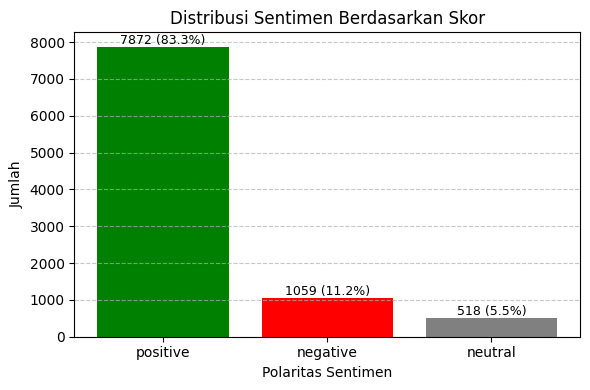

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts = data['score_based_polarity'].value_counts()
total = sentiment_counts.sum()

plt.figure(figsize=(6, 4))
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'gray'])

plt.title('Distribusi Sentimen Berdasarkan Skor')
plt.xlabel('Polaritas Sentimen')
plt.ylabel('Jumlah')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    percent = (height / total) * 100
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{height:.0f} ({percent:.1f}%)',
        ha='center', va='bottom', fontsize=9
    )

plt.tight_layout()
plt.show()


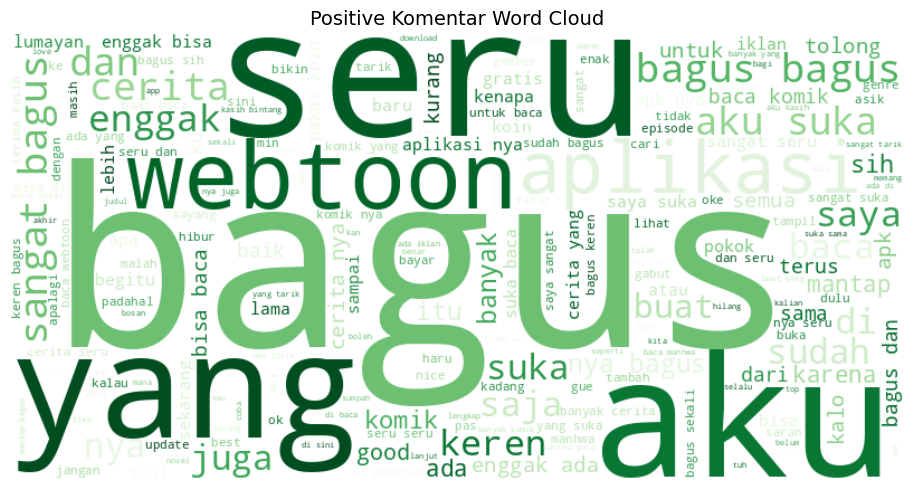

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

positive_texts = data[data['score_based_polarity'] == 'positive']['stemmed_g']

normalisasi = {
    "baguss": "bagus",
    "bagu": "bagus",
    "baghs": "bagus",
    "bgs": "bagus",
    "ngett": "banget",
    "ngehalu": "halu",
}

def normalize_text(text):
    words = text.split()
    normalized_words = [normalisasi.get(w, w) for w in words]
    return " ".join(normalized_words)

positive_texts = positive_texts.apply(normalize_text)

positive_text = " ".join(positive_texts)

stopwords = set(STOPWORDS)
custom_stopwords = {
    "banget","aja","ya","ini","jadi",
    "tapi","udah","udah","kayak","dong","deh","lah","nih",
    "cuma","cuman","kok","pun","lagi","biar","toh"
}
stopwords.update(custom_stopwords)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=200,
    colormap="Greens",
    stopwords=stopwords,
    prefer_horizontal=0.9
).generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Komentar Word Cloud", fontsize=14)
plt.tight_layout()
plt.show()


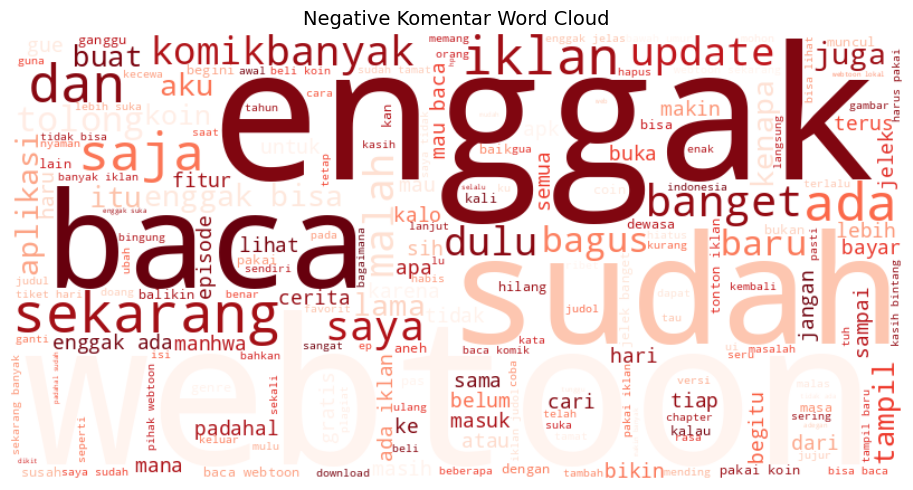

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

negative_texts = data[data['score_based_polarity'] == 'negative']['stemmed_g']

negative_text = " ".join(negative_texts)

stopwords = set(STOPWORDS)
custom_stopwords = {
    "aja","ya","ini","jadi",
    "tapi","udah","udah","kayak","dong","deh","lah","nih",
    "cuma","cuman","kok","pun","lagi","biar","toh", "yang", "di", "nya"
}
stopwords.update(custom_stopwords)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=200,
    colormap="Reds",
    stopwords=stopwords,
    prefer_horizontal=0.9
).generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Komentar Word Cloud", fontsize=14)
plt.tight_layout()
plt.show()


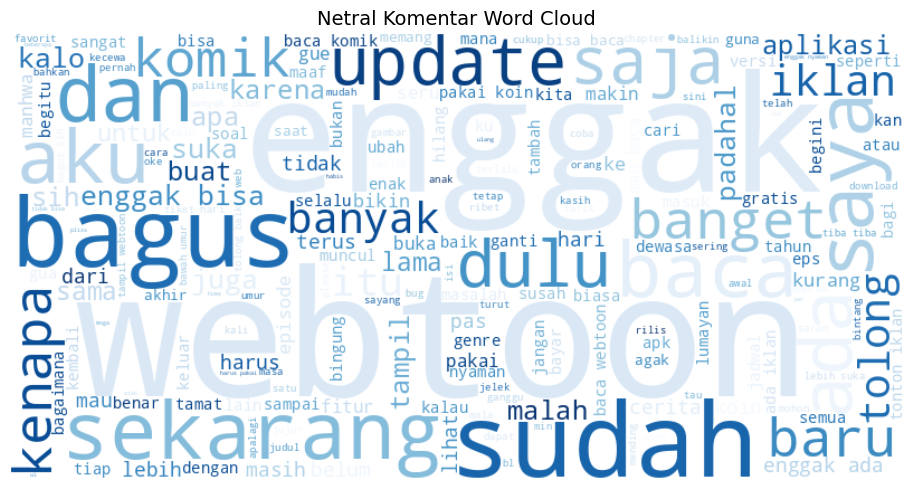

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

neutral_texts = data[data['score_based_polarity'] == 'neutral']['stemmed_g']

neutral_text = " ".join(neutral_texts)

stopwords = set(STOPWORDS)
custom_stopwords = {
    "aja","ya","ini","jadi",
    "tapi","udah","udah","kayak","dong","deh","lah","nih",
    "cuma","cuman","kok","pun","lagi","biar","toh", "yang", "di", "nya"
}
stopwords.update(custom_stopwords)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=200,
    colormap="Blues",
    stopwords=stopwords,
    prefer_horizontal=0.9
).generate(neutral_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Netral Komentar Word Cloud", fontsize=14)
plt.tight_layout()
plt.show()


# OVERSAMPLING

oversampling dilakukan untuk menyeimbangkan antara data positif, negatid dan netral

In [ ]:
from sklearn.utils import resample

positive_data = data[data['score_based_polarity'] == 'positive']
negative_data = data[data['score_based_polarity'] == 'negative']
neutral_data = data[data['score_based_polarity'] == 'neutral']

target_count = len(positive_data)

negative_upsampled = resample(
    negative_data,
    replace=True,
    n_samples=target_count,
    random_state=42
)

neutral_upsampled = resample(
    neutral_data,
    replace=True,
    n_samples=target_count,
    random_state=42
)

balanced_data = pd.concat([positive_data, negative_upsampled, neutral_upsampled])

balanced_data.to_csv('/content/drive/MyDrive/encore1/balanced_data.csv', index=False)

print(balanced_data['score_based_polarity'].value_counts())

score_based_polarity
positive    7872
negative    7872
neutral     7872
Name: count, dtype: int64


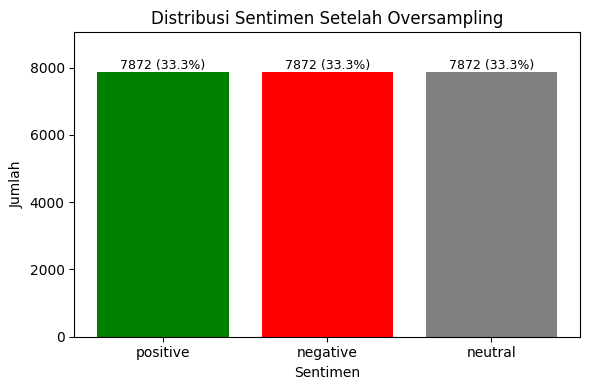

In [ ]:
import matplotlib.pyplot as plt

balanced_counts = balanced_data['score_based_polarity'].value_counts()
total = balanced_counts.sum()
percentages = (balanced_counts / total) * 100

plt.figure(figsize=(6, 4))
bars = plt.bar(balanced_counts.index, balanced_counts.values, color=['green', 'red', 'gray'])

for bar, count, percentage in zip(bars, balanced_counts.values, percentages):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 2,
             f'{count} ({percentage:.1f}%)',
             ha='center', va='bottom', fontsize=9)

plt.title('Distribusi Sentimen Setelah Oversampling')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.ylim(0, max(balanced_counts.values) * 1.15)
plt.tight_layout()
plt.show()


# DATASET SPLITTING

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = balanced_data['stemmed_g']
y = balanced_data['score_based_polarity']

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=15/85, random_state=42, stratify=y_temp
)

train_set = pd.DataFrame({'stemmed_g': X_train, 'score_based_polarity': y_train})
val_set = pd.DataFrame({'stemmed_g': X_val, 'score_based_polarity': y_val})
test_set = pd.DataFrame({'stemmed_g': X_test, 'score_based_polarity': y_test})

train_set.to_csv('/content/drive/MyDrive/encore1/train_set.tsv', index=False, sep='\t', header=False)
val_set.to_csv('/content/drive/MyDrive/encore1/val_set.tsv', index=False, sep='\t', header=False)
test_set.to_csv('/content/drive/MyDrive/encore1/test_set.tsv', index=False, sep='\t', header=False)

print("70:15:15 Split")
print("Train:", len(train_set))
print("Validation:", len(val_set))
print("Test:", len(test_set))
print("Total:", len(train_set) + len(val_set) + len(test_set))


70:15:15 Split
Train: 16530
Validation: 3543
Test: 3543
Total: 23616


# INISIALISASI MODEL

In [ ]:
!git clone https://github.com/indobenchmark/indonlu.git

%cd indonlu

!pip install -r "/content/drive/MyDrive/encore1/requirements.txt"

%cd ..

import sys
sys.path.append("/content/indonlu")

Cloning into 'indonlu'...
remote: Enumerating objects: 509, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 509 (delta 119), reused 139 (delta 110), pack-reused 316 (from 1)
Receiving objects: 100% (509/509), 9.46 MiB | 15.80 MiB/s, done.
Resolving deltas: 100% (239/239), done.
/content/indonlu
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:

In [ ]:
!pip install transformers
!pip install indobenchmark-toolkit
!pip install torch transformers pandas scikit-learn sentencepiece seqeval

import random
import torch
import torch.nn.functional as F
from torch import optim
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, BertConfig
from indonlu.utils.forward_fn import forward_sequence_classification
from indonlu.utils.metrics import document_sentiment_metrics_fn
from indonlu.utils.data_utils import DocumentSentimentDataset, DocumentSentimentDataLoader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=b1874d5d077c48f081513431b0625fdf5b0d06dda2ad0d4f9e96ea03b2650946
  Stored in directory: /root/.cache/pip/wheels/bc/92/f0/243288f899c2eacdfa8c5f9aede4c71a9bad0ee26a01dc5ead
Successfully built seqeval


In [ ]:
tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p1")

config = BertConfig.from_pretrained("indobenchmark/indobert-base-p1")
config.num_labels = DocumentSentimentDataset.NUM_LABELS

model = BertForSequenceClassification.from_pretrained("indobenchmark/indobert-base-p1", config=config)

print(model)

def count_param(module, trainable=False):
    if trainable:
        return sum(p.numel() for p in module.parameters() if p.requires_grad)
    else:
        return sum(p.numel() for p in module.parameters())

print(count_param(model))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

def count_param(module, trainable=False):
    if trainable:
        return sum(p.numel() for p in module.parameters() if p.requires_grad)
    else:
        return sum(p.numel() for p in module.parameters())

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def metrics_to_string(metric_dict):
    string_list = []
    for key, value in metric_dict.items():
        string_list.append('{}:{:.2f}'.format(key, value))
    return ' '.join(string_list)

In [ ]:
set_seed(27)

# PREPRARING DATASET & ADDING ENCODER

In [ ]:
train_dataset_path = '/content/drive/MyDrive/encore1/train_set.tsv'
val_dataset_path = '/content/drive/MyDrive/encore1/val_set.tsv'
test_dataset_path = '/content/drive/MyDrive/encore1/test_set.tsv'

In [ ]:
train_dataset = DocumentSentimentDataset(train_dataset_path, tokenizer, lowercase=True)
val_dataset = DocumentSentimentDataset(val_dataset_path, tokenizer, lowercase=True)
test_dataset = DocumentSentimentDataset(test_dataset_path, tokenizer, lowercase=True)

In [ ]:
print("Train Dataset:", len(train_dataset), "samples")
print("Validation Dataset:", len(val_dataset), "samples")
print("Test Dataset:", len(test_dataset), "samples")

Train Dataset: 16530 samples
Validation Dataset: 3543 samples
Test Dataset: 3543 samples


In [ ]:
for i in range(5):
    sample = train_dataset[i]

    input_ids = sample[0]
    label_id = sample[1]

    tokens = tokenizer.convert_ids_to_tokens(input_ids)

    print(f"\nSAMPLE KE-{i+1}")
    print("Teks asli (stemmed_g):", train_set.iloc[i]['stemmed_g'])
    print("Label           :", i2w[int(label_id)])
    print("Tokens          :", tokens)
    print("Input IDs       :", input_ids)


SAMPLE KE-1
Teks asli (stemmed_g): turut saya sini lebih baik tambah seperti buah pustaka yang bisa kita edit nama agar dapat kelompok buah komik tidsk susah untuk cari komik favorit dan kelompok genre seperti genre drama action fanatasy saja kurang detail
Label           : neutral
Tokens          : ['[CLS]', 'turut', 'saya', 'sini', 'lebih', 'baik', 'tambah', 'seperti', 'buah', 'pustaka', 'yang', 'bisa', 'kita', 'edit', 'nama', 'agar', 'dapat', 'kelompok', 'buah', 'komik', 'tid', '##sk', 'susah', 'untuk', 'cari', 'komik', 'favorit', 'dan', 'kelompok', 'genre', 'seperti', 'genre', 'drama', 'action', 'fana', '##tas', '##y', 'saja', 'kurang', 'detail', '[SEP]']
Input IDs       : [    2  5295   209  1585   216   342  3837   295  1307  7123    34   166
   219  5087   712   579   173  1311  1307  8845   114 10172  3684    90
  2203  8845  4760    41  1311 14639   295 14639  4577 10369 27980  2763
 30371   377  1057  3460     3]

SAMPLE KE-2
Teks asli (stemmed_g): jangan pakai koin dong aku

# PEMUATAN DATASET DENGAN HYPERPARAMER



In [ ]:
train_loader = DocumentSentimentDataLoader(dataset=train_dataset, max_seq_len=512, batch_size=32, num_workers=16, shuffle=True)
val_loader = DocumentSentimentDataLoader(dataset=val_dataset, max_seq_len=512, batch_size=32, num_workers=16, shuffle=False)
test_loader = DocumentSentimentDataLoader(dataset=test_dataset, max_seq_len=512, batch_size=32, num_workers=16, shuffle=False)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
w2i, i2w = DocumentSentimentDataset.LABEL2INDEX, DocumentSentimentDataset.INDEX2LABEL
print(w2i)
print(i2w)

{'positive': 0, 'neutral': 1, 'negative': 2}
{0: 'positive', 1: 'neutral', 2: 'negative'}


uji coba pretained

In [ ]:
text = 'aplikasinya bagus'
subword = tokenizer.encode(text)
subword = torch.LongTensor(subword).view(1, -1).to(model.device)

logits = model(subword)[0]
label = torch.topk(logits, k=1, dim=-1)[1].squeeze().item()

print(f'Text: {text} | Label : {i2w[label]} ({F.softmax(logits, dim=-1).squeeze()[label] * 100:.3f}%)')

Text: aplikasinya bagus | Label : positive (42.141%)


In [ ]:
text = 'aplikasinya lemot'
subword = tokenizer.encode(text)
subword = torch.LongTensor(subword).view(1, -1).to(model.device)

logits = model(subword)[0]
label = torch.topk(logits, k=1, dim=-1)[1].squeeze().item()

print(f'Text: {text} | Label : {i2w[label]} ({F.softmax(logits, dim=-1).squeeze()[label] * 100:.3f}%)')

Text: aplikasinya lemot | Label : positive (42.236%)


# FINE TUNNING

In [ ]:
# OPTIMIZER
optimizer = optim.Adam(model.parameters(), lr=3e-5)
model = model.cuda()

In [ ]:
from collections import defaultdict
from tqdm import tqdm

n_epochs = 5
history = defaultdict(list)

for epoch in range(n_epochs):
    # TRAIN
    model.train()
    torch.set_grad_enabled(True)

    total_train_loss = 0
    list_hyp = []
    list_label = []

    train_pbar = tqdm(train_loader, leave=True, total=len(train_loader))
    for i, batch_data in enumerate(train_pbar):
        loss, batch_hyp, batch_label = forward_sequence_classification(
            model, batch_data[:-1], i2w=i2w, device='cuda')

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        tr_loss = loss.item()
        total_train_loss += tr_loss
        list_hyp += batch_hyp
        list_label += batch_label

        train_pbar.set_description("(Epoch {}) TRAIN LOSS:{:.4f} LR:{:.8f}".format(
            (epoch + 1), total_train_loss / (i + 1), get_lr(optimizer)))

    metrics = document_sentiment_metrics_fn(list_hyp, list_label)
    print("(Epoch {}) TRAIN LOSS:{:.4f} {} LR:{:.8f}".format(
        (epoch + 1), total_train_loss / len(train_loader), metrics_to_string(metrics), get_lr(optimizer)))
    history['train_acc'].append(metrics['ACC'])

    # VALIDATION
    model.eval()
    torch.set_grad_enabled(False)

    total_loss = 0
    list_hyp = []
    list_label = []

    pbar = tqdm(val_loader, leave=True, total=len(val_loader))
    for i, batch_data in enumerate(pbar):
        batch_seq = batch_data[-1]
        loss, batch_hyp, batch_label = forward_sequence_classification(
            model, batch_data[:-1], i2w=i2w, device='cuda')

        total_loss += loss.item()
        list_hyp += batch_hyp
        list_label += batch_label

        pbar.set_description("VALID LOSS:{:.4f}".format(total_loss / (i + 1)))

    metrics = document_sentiment_metrics_fn(list_hyp, list_label)
    print("(Epoch {}) VALID LOSS:{:.4f} {}".format(
        (epoch + 1), total_loss / len(val_loader), metrics_to_string(metrics)))

    history['val_acc'].append(metrics['ACC'])
    history['val_loss'].append(total_loss / len(val_loader))
    history['val_f1'].append(metrics['F1'])


(Epoch 1) TRAIN LOSS:0.4546 LR:0.00003000: 100%|██████████| 517/517 [03:34<00:00,  2.41it/s]


(Epoch 1) TRAIN LOSS:0.4546 ACC:0.83 F1:0.83 REC:0.83 PRE:0.83 LR:0.00003000


  0%|          | 0/111 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
VALID LOSS:0.2067: 100%|██████████| 111/111 [00:16<00:00,  6.78it/s]


(Epoch 1) VALID LOSS:0.2067 ACC:0.93 F1:0.93 REC:0.93 PRE:0.93


  0%|          | 0/517 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
(Epoch 2) TRAIN LOSS:0.1721 LR:0.00003000: 100%|██████████| 517/517 [03:40<00:00,  2.35it/s]


(Epoch 2) TRAIN LOSS:0.1721 ACC:0.94 F1:0.94 REC:0.94 PRE:0.94 LR:0.00003000


  0%|          | 0/111 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
VALID LOSS:0.1606: 100%|██████████| 111/111 [00:16<00:00,  6.73it/s]


(Epoch 2) VALID LOSS:0.1606 ACC:0.95 F1:0.95 REC:0.95 PRE:0.95


  0%|          | 0/517 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
(Epoch 3) TRAIN LOSS:0.1310 LR:0.00003000: 100%|██████████| 517/517 [03:38<00:00,  2.36it/s]


(Epoch 3) TRAIN LOSS:0.1310 ACC:0.96 F1:0.96 REC:0.96 PRE:0.96 LR:0.00003000


  0%|          | 0/111 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
VALID LOSS:0.1559: 100%|██████████| 111/111 [00:16<00:00,  6.64it/s]


(Epoch 3) VALID LOSS:0.1559 ACC:0.95 F1:0.95 REC:0.95 PRE:0.95


  0%|          | 0/517 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
(Epoch 4) TRAIN LOSS:0.1127 LR:0.00003000: 100%|██████████| 517/517 [03:40<00:00,  2.34it/s]


(Epoch 4) TRAIN LOSS:0.1127 ACC:0.96 F1:0.96 REC:0.96 PRE:0.96 LR:0.00003000


  0%|          | 0/111 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
VALID LOSS:0.1561: 100%|██████████| 111/111 [00:16<00:00,  6.74it/s]


(Epoch 4) VALID LOSS:0.1561 ACC:0.95 F1:0.95 REC:0.95 PRE:0.95


  0%|          | 0/517 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
(Epoch 5) TRAIN LOSS:0.1071 LR:0.00003000: 100%|██████████| 517/517 [03:40<00:00,  2.34it/s]


(Epoch 5) TRAIN LOSS:0.1071 ACC:0.96 F1:0.96 REC:0.96 PRE:0.96 LR:0.00003000


  0%|          | 0/111 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
VALID LOSS:0.1878: 100%|██████████| 111/111 [00:16<00:00,  6.69it/s]

(Epoch 5) VALID LOSS:0.1878 ACC:0.94 F1:0.94 REC:0.94 PRE:0.94


learning curve

In [ ]:
print(len(history['train_acc']), len(history['val_acc']))

5 5


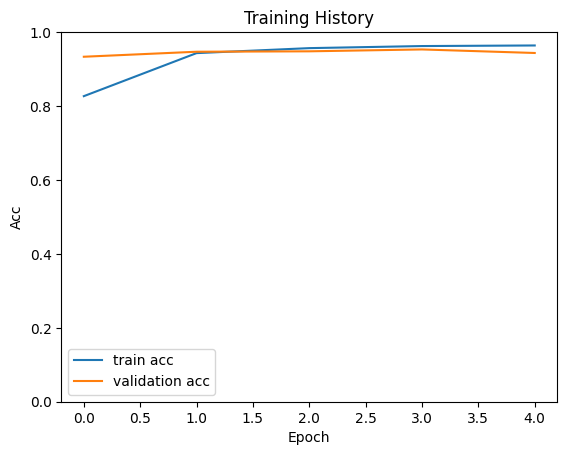

In [ ]:
plt.plot(history['train_acc'], label='train acc')
plt.plot(history['val_acc'], label='validation acc')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.ylim([0, 1])
plt.show()

# CONFUSION MATRIX

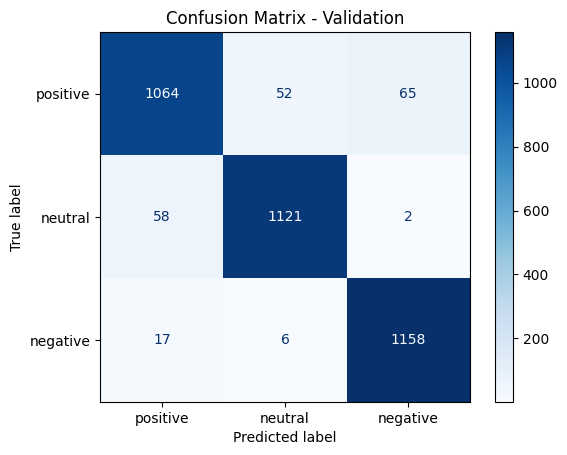

Confusion Matrix (urut labels): ['positive', 'neutral', 'negative']
[[1064   52   65]
 [  58 1121    2]
 [  17    6 1158]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

map_label = {
    "pos": "positive", "positive": "positive",
    "neu": "neutral",  "neutral": "neutral",
    "neg": "negative", "negative": "negative"
}

y_true = np.array([map_label.get(x, x) for x in list_label])
y_pred = np.array([map_label.get(x, x) for x in list_hyp])

labels = ["positive", "neutral", "negative"]

cm = confusion_matrix(y_true, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Validation")
plt.show()

print("Confusion Matrix (urut labels):", labels)
print(cm)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support

print("\nAccuracy:", accuracy_score(y_true, y_pred))

print("\nClassification Report:\n",
      classification_report(
          y_true, y_pred,
          labels=labels,
          target_names=labels,
          zero_division=0
      ))


Accuracy: 0.9435506632797065

Classification Report:
               precision    recall  f1-score   support

    positive       0.93      0.90      0.92      1181
     neutral       0.95      0.95      0.95      1181
    negative       0.95      0.98      0.96      1181

    accuracy                           0.94      3543
   macro avg       0.94      0.94      0.94      3543
weighted avg       0.94      0.94      0.94      3543



In [ ]:
for i, lab in enumerate(labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    precision = TP / (TP + FP) if (TP + FP) else 0.0
    recall    = TP / (TP + FN) if (TP + FN) else 0.0
    f1_manual = 2 * precision * recall / (precision + recall) if (precision + recall) else 0.0

    print(f"\n[Manual] {lab}")
    print(f"  TP={TP}, FP={FP}, FN={FN}, TN={TN}")
    print(f"  Precision={precision:.2f}, Recall={recall:.2f}, F1={f1_manual:.2f}")



[Manual] positive
  TP=1064, FP=75, FN=117, TN=2287
  Precision=0.93, Recall=0.90, F1=0.92

[Manual] neutral
  TP=1121, FP=58, FN=60, TN=2304
  Precision=0.95, Recall=0.95, F1=0.95

[Manual] negative
  TP=1158, FP=67, FN=23, TN=2295
  Precision=0.95, Recall=0.98, F1=0.96


# UJI COBA SETELAH FINE TUNNING

In [ ]:
text = 'aplikasinya bagus, aku suka banget banyak komik yang bisa di baca'
subword = tokenizer.encode(text)
subword = torch.LongTensor(subword).view(1, -1).to(model.device)

logits = model(subword)[0]
label = torch.topk(logits, k=1, dim=-1)[1].squeeze().item()

print(f'Text: {text} | Label : {i2w[label]} ({F.softmax(logits, dim=-1).squeeze()[label] * 100:.3f}%)')

Text: aplikasinya bagus, aku suka banget banyak komik yang bisa di baca | Label : positive (99.910%)


In [ ]:
text = 'banyak judul baru makin seru aja baca webtoon'
subword = tokenizer.encode(text)
subword = torch.LongTensor(subword).view(1, -1).to(model.device)

logits = model(subword)[0]
label = torch.topk(logits, k=1, dim=-1)[1].squeeze().item()

print(f'Text: {text} | Label : {i2w[label]} ({F.softmax(logits, dim=-1).squeeze()[label] * 100:.3f}%)')

Text: banyak judul baru makin seru aja baca webtoon | Label : positive (68.691%)


In [ ]:
text = 'aplikasinya jelek, lama bgt loading nya trus banyak iklan nya'
subword = tokenizer.encode(text)
subword = torch.LongTensor(subword).view(1, -1).to(model.device)

logits = model(subword)[0]
label = torch.topk(logits, k=1, dim=-1)[1].squeeze().item()

print(f'Text: {text} | Label : {i2w[label]} ({F.softmax(logits, dim=-1).squeeze()[label] * 100:.3f}%)')

Text: aplikasinya jelek, lama bgt loading nya trus banyak iklan nya | Label : negative (99.882%)


In [ ]:
text = 'dikit-dikit koin'
subword = tokenizer.encode(text)
subword = torch.LongTensor(subword).view(1, -1).to(model.device)

logits = model(subword)[0]
label = torch.topk(logits, k=1, dim=-1)[1].squeeze().item()

print(f'Text: {text} | Label : {i2w[label]} ({F.softmax(logits, dim=-1).squeeze()[label] * 100:.3f}%)')

Text: dikit-dikit koin | Label : negative (99.918%)


In [ ]:
text = 'gara-gara di update tampilannya jadi agak aneh,tapi gpp karna banyak judul baru'
subword = tokenizer.encode(text)
subword = torch.LongTensor(subword).view(1, -1).to(model.device)

logits = model(subword)[0]
label = torch.topk(logits, k=1, dim=-1)[1].squeeze().item()

print(f'Text: {text} | Label : {i2w[label]} ({F.softmax(logits, dim=-1).squeeze()[label] * 100:.3f}%)')

Text: gara-gara di update tampilannya jadi agak aneh,tapi gpp karna banyak judul baru | Label : neutral (54.441%)


In [ ]:
text = 'tolong kebih banyak masukin webtoon yang bagus-bagus nya dan banyakin promo buat beli koin '
subword = tokenizer.encode(text)
subword = torch.LongTensor(subword).view(1, -1).to(model.device)

logits = model(subword)[0]
label = torch.topk(logits, k=1, dim=-1)[1].squeeze().item()

print(f'Text: {text} | Label : {i2w[label]} ({F.softmax(logits, dim=-1).squeeze()[label] * 100:.3f}%)')

Text: tolong kebih banyak masukin webtoon yang bagus-bagus nya dan banyakin promo buat beli koin  | Label : positive (96.260%)


In [ ]:
text = 'aplikasinya agak bug terlalu banyak iklan, tampilannya juga berubah'
subword = tokenizer.encode(text)
subword = torch.LongTensor(subword).view(1, -1).to(model.device)

logits = model(subword)[0]
label = torch.topk(logits, k=1, dim=-1)[1].squeeze().item()

print(f'Text: {text} | Label : {i2w[label]} ({F.softmax(logits, dim=-1).squeeze()[label] * 100:.3f}%)')

Text: aplikasinya agak bug terlalu banyak iklan, tampilannya juga berubah | Label : negative (68.652%)


In [ ]:
text = 'kadang hrus byar atau nonton iklan GK seru'
subword = tokenizer.encode(text)
subword = torch.LongTensor(subword).view(1, -1).to(model.device)

logits = model(subword)[0]
label = torch.topk(logits, k=1, dim=-1)[1].squeeze().item()

print(f'Text: {text} | Label : {i2w[label]} ({F.softmax(logits, dim=-1).squeeze()[label] * 100:.3f}%)')

Text: kadang hrus byar atau nonton iklan GK seru | Label : neutral (96.515%)


In [ ]:
text = 'baca dari tahun 2016, masih lumayan tampilannya'
subword = tokenizer.encode(text)
subword = torch.LongTensor(subword).view(1, -1).to(model.device)

logits = model(subword)[0]
label = torch.topk(logits, k=1, dim=-1)[1].squeeze().item()

print(f'Text: {text} | Label : {i2w[label]} ({F.softmax(logits, dim=-1).squeeze()[label] * 100:.3f}%)')

Text: baca dari tahun 2016, masih lumayan tampilannya | Label : neutral (89.276%)


In [ ]:
text = 'kirain pakai koin bakal kebuka terus'
subword = tokenizer.encode(text)
subword = torch.LongTensor(subword).view(1, -1).to(model.device)

logits = model(subword)[0]
label = torch.topk(logits, k=1, dim=-1)[1].squeeze().item()

print(f'Text: {text} | Label : {i2w[label]} ({F.softmax(logits, dim=-1).squeeze()[label] * 100:.3f}%)')

Text: kirain pakai koin bakal kebuka terus | Label : neutral (99.511%)


In [ ]:
text = 'tampilan aneh, tiket harian bikin malesn'
subword = tokenizer.encode(text)
subword = torch.LongTensor(subword).view(1, -1).to(model.device)

logits = model(subword)[0]
label = torch.topk(logits, k=1, dim=-1)[1].squeeze().item()

print(f'Text: {text} | Label : {i2w[label]} ({F.softmax(logits, dim=-1).squeeze()[label] * 100:.3f}%)')

Text: tampilan aneh, tiket harian bikin malesn | Label : neutral (52.844%)


In [ ]:
text = 'banyak judul baru setelah update'
subword = tokenizer.encode(text)
subword = torch.LongTensor(subword).view(1, -1).to(model.device)

logits = model(subword)[0]
label = torch.topk(logits, k=1, dim=-1)[1].squeeze().item()

print(f'Text: {text} | Label : {i2w[label]} ({F.softmax(logits, dim=-1).squeeze()[label] * 100:.3f}%)')

Text: banyak judul baru setelah update | Label : positive (99.482%)
